In [1]:
import pandas as pd
import numpy as np
import math as ma

## Data Cleaning

In [80]:
coffee=pd.read_csv('instant_coffee_amazon.csv')

In [81]:
len(coffee)
len(coffee.columns)

4572

23

In [82]:
coffee.columns.tolist()

['ASIN',
 'FBA',
 'amazon_choice',
 'answered_questions',
 'brand',
 'price',
 'productDescription',
 'product_image_urls',
 'product_name',
 'product_url',
 'rating_1_star',
 'rating_2_star',
 'rating_3_star',
 'rating_4_star',
 'rating_5_star',
 'rating_avg',
 'rating_nums',
 'shipping_weight',
 'subscribe',
 'subscribe_price_15per',
 'subscribe_price_5per',
 'top_sales_rank',
 'unit_price']

In [4]:
dups = pd.concat(g for _, g in coffee.groupby("ASIN") if len(g) > 1)

,ASIN,FBA,amazon_choice,answered_questions,brand,price,productDescription,product_image_urls,product_name,product_url,...,rating_4_star,rating_5_star,rating_avg,rating_nums,shipping_weight,subscribe,subscribe_price_15per,subscribe_price_5per,top_sales_rank,unit_price
3821,B0001MAF2U,Sold by 2ndTimesaCharm and Fulfilled by Amazon.,False,7.0,Brand: Fireside,$14.49,"The buttery, rich, traditional flavor you love...",https://m.media-amazon.com/images/I/71Fl7x5EPA...,Fireside Coffee Instant Cafe Mocha (Butter Rum...,https://www.amazon.com/Fireside-Coffee-Instant...,...,47%,43%,4.2,18.0,9.6 ounces (,NaN,NaN,NaN,1604.0,($14.49 / Item)
3862,B0001MAF2U,Sold by 2ndTimesaCharm and Fulfilled by Amazon.,False,7.0,Brand: Fireside,$14.49,"The buttery, rich, traditional flavor you love...",https://m.media-amazon.com/images/I/71Fl7x5EPA...,Fireside Coffee Instant Cafe Mocha (Butter Rum...,https://www.amazon.com/Fireside-Coffee-Instant...,...,47%,43%,4.2,18.0,9.6 ounces (,NaN,NaN,NaN,1604.0,($14.49 / Item)
3912,B000H299AI,Sold by OnlinePrimeBrands and Fulfilled by Ama...,False,3.0,Brand: Caffe D'Vita,$36.99,Our Coffee and premium ingredients create a ri...,https://m.media-amazon.com/images/I/61ID8KILXm...,"Caffe D’Vita French Vanilla Cappuccino, 6 Pack...",https://www.amazon.com/Caffe-DVita-French-Vani...,...,6%,75%,4.4,70.0,7.9 pounds (,NaN,NaN,NaN,455.0,12 x 9 x 5.5 inches ; 6.9 pounds
3952,B000H299AI,Sold by OnlinePrimeBrands and Fulfilled by Ama...,False,3.0,Brand: Caffe D'Vita,$36.99,Our Coffee and premium ingredients create a ri...,https://m.media-amazon.com/images/I/61ID8KILXm...,"Caffe D’Vita French Vanilla Cappuccino, 6 Pack...",https://www.amazon.com/Caffe-DVita-French-Vani...,...,6%,75%,4.4,70.0,7.9 pounds (,NaN,NaN,NaN,455.0,12 x 9 x 5.5 inches ; 6.9 pounds


In [5]:
coffee.sort_values("ASIN", inplace = True)
coffee.drop_duplicates(subset ="ASIN", inplace = True)
len(coffee)

4369

In [6]:
coffee.set_index('ASIN',inplace=True)

In [7]:
coffee.sample(10)

,FBA,amazon_choice,answered_questions,brand,price,productDescription,product_image_urls,product_name,product_url,rating_1_star,...,rating_4_star,rating_5_star,rating_avg,rating_nums,shipping_weight,subscribe,subscribe_price_15per,subscribe_price_5per,top_sales_rank,unit_price
ASIN,,,,,,,,,,,,,,,,,,,,,
B00L3EMQEK,Ships from and sold by iSale-uSave (USA).,False,NaN,Brand: Starbucks,$35.23,CAFFE MOCHA LATTE WITH DUTCHED AND NATURAL COC...,https://m.media-amazon.com/images/I/71njd+a+tQ...,Starbucks VIA Latte - Caffe Mocha (5 Single Se...,https://www.amazon.com/Starbucks-VIA-Latte-Sin...,100%,...,0%,0%,1.0,2.0,2 pounds (,NaN,NaN,NaN,884.0,($8.81 / Item)
B07M9CW4KY,Ships from and sold by Mighty Depot.,False,NaN,Brand: HICOMI,$29.99,The world renowned White Coffee originated fro...,https://m.media-amazon.com/images/I/41G3rhVnT0...,HICOMI Musang King Durian 4in1 Ipoh Instant Wh...,https://www.amazon.com/HICOMI-Musang-Durian-In...,0%,...,32%,68%,4.7,4.0,1.4 pounds (,NaN,NaN,NaN,2035.0,($2.00 / Count)
B084L2LTF2,Ships from and sold by Klatch Coffee Inc.,False,NaN,"Brand: Klatch Coffee, Inc.",$17.00,NaN,https://m.media-amazon.com/images/I/81IKaKazAD...,Klatch Coffee Single Serve 8 Pack Variety,https://www.amazon.com/Klatch-Coffee-Single-Se...,0%,...,0%,0%,NaN,NaN,1 ounces (,NaN,NaN,NaN,NaN,($2.13 / Count)
B07XVPY4BD,Ships from and sold by CoffeeLover1111.,False,NaN,Brand: GANO EXCEL INTERNATIONAL,$132.00,GanoCafé 3-in-1 is the perfect blend of qualit...,https://m.media-amazon.com/images/I/6185W0qTmv...,NEW PACKAGE 10 Box Gano Excel Ganocafe Ganolic...,https://www.amazon.com/PACKAGE-Ganocafe-Ganoli...,0%,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,($132.00 / Count)
B004T3QD14,NaN,False,NaN,Brand: MAXWELL HOUSE,$29.18,Inspired by some of your favorite internationa...,https://m.media-amazon.com/images/I/81HKG7pjtg...,Maxwell House International Sugar-Free French ...,https://www.amazon.com/Maxwell-International-F...,12%,...,5%,78%,4.4,143.0,1.2 pounds,NaN,NaN,NaN,574.0,4 ounces
B002O48TRG,Sold by Special Supply and Fulfilled by Amazon.,True,10.0,Brand: Tim Hortons,$13.69,Tim Hortons first opened its doors in 1964. Si...,https://m.media-amazon.com/images/I/712ANgADFy...,"Tim Horton's Instant Cappuccino, French Vanill...",https://www.amazon.com/Tim-Hortons-Cappuccino-...,10%,...,11%,70%,4.3,613.0,1.1 pounds (,NaN,NaN,NaN,194.0,($0.86 / Ounce)
B07CLNRZGW,Ships from and sold by PrimeHub CA.,False,NaN,Brand: SUPER,$16.59,NaN,https://m.media-amazon.com/images/I/518zSt-U2d...,Super Coffee / 3 In 1 Instant Mix / Rich Blend...,https://www.amazon.com/Super-Instant-Special-S...,0%,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,($0.78 / Ounce)
B07H6Z4H2M,Ships from and sold by Ceylontrend.,False,NaN,Brand: Nescafé,$25.80,To take your coffee experiences to the next le...,https://m.media-amazon.com/images/I/91SWNbCp6Q...,Nescafe classic 50g x3pcs,https://www.amazon.com/Nescaf%C3%A9-Nescafe-cl...,0%,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,($25.80 / Count)
B086ZZZWQJ,Ships from and sold by Nezool Store.,False,NaN,Brand: JACOBS,$20.00,"instant coffee 85%, ground coffee 15%. The spe...",https://m.media-amazon.com/images/I/619nTEkK0H...,Instant Coffee Jacobs Barista Editions America...,https://www.amazon.com/Instant-Jacobs-Barista-...,0%,...,0%,0%,NaN,NaN,6.6 ounces (,NaN,NaN,NaN,NaN,($0.77 / Count)


In [9]:
coffee['FBA'] = coffee['FBA'].fillna('')

In [10]:
coffee['FBA_label'] = ['Amazon product' if x.find('Ships from and sold by Amazon.com')!=-1 else 'FBA' if x.find('Fulfilled by Amazon')!=-1 else '' if x=='' else 'Third Party' for x in coffee['FBA']]

In [12]:
cols = coffee.columns.tolist()
# cols
cols = cols[-1:] + cols[:-1]
coffee = coffee[cols]

In [13]:
coffee['answered_questions'] = coffee['answered_questions'].fillna(0)

In [14]:
coffee.dtypes

FBA_label                 object
FBA                       object
amazon_choice               bool
answered_questions       float64
brand                     object
price                     object
productDescription        object
product_image_urls        object
product_name              object
product_url               object
rating_1_star             object
rating_2_star             object
rating_3_star             object
rating_4_star             object
rating_5_star             object
rating_avg               float64
rating_nums              float64
shipping_weight           object
subscribe                 object
subscribe_price_15per     object
subscribe_price_5per      object
top_sales_rank           float64
unit_price                object
dtype: object

In [15]:
coffee.answered_questions=coffee.answered_questions.astype('int32')

In [16]:
coffee['brand'] = coffee['brand'].astype('str').str.split('Brand: ').str[-1]

,FBA_label,FBA,amazon_choice,answered_questions,brand,price,productDescription,product_image_urls,product_name,product_url,...,rating_4_star,rating_5_star,rating_avg,rating_nums,shipping_weight,subscribe,subscribe_price_15per,subscribe_price_5per,top_sales_rank,unit_price
ASIN,,,,,,,,,,,,,,,,,,,,,
B07LGK8H5P,,,False,0,VFINITY,$65.00,KETOPERK unique clean coffee blend of ultra-pr...,https://m.media-amazon.com/images/I/41i+QfyzMg...,KETOPERK Ultra Premium Weight Management Colom...,https://www.amazon.com/KETOPERK-Premium-Manage...,...,0%,0%,NaN,NaN,9.3 ounces,NaN,NaN,NaN,3373.0,9.3 ounces
B07CGQ5TLK,Third Party,Ships from and sold by PrimeHub CA.,False,0,Hainan Lao,$17.49,Preparation:,https://m.media-amazon.com/images/I/51yQi8zpj+...,Mr. Hainan Lao/Instant Premix Hainanese Tradit...,https://www.amazon.com/Hainan-Lao-Hainanese-Tr...,...,0%,100%,5.0,1.0,NaN,NaN,NaN,NaN,3952.0,($0.03 / Gram)
B07RXR5ZS2,Third Party,Ships from and sold by JARSA HAUS.,False,0,Organo Gold,$156.00,100% Certified Organic Ganoderma Lucidum. More...,https://m.media-amazon.com/images/I/51-bUtX5Kv...,Organo Gold Ganoderma Cafe Latte 8 Boxes,https://www.amazon.com/Organo-Gold-Ganoderma-L...,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,($19.50 / Count)
B08DCKRDPF,Third Party,Ships from and sold by 628MART.,False,0,Aik Cheong,$68.88,NaN,https://m.media-amazon.com/images/I/61qvE1-ixa...,Aik Cheong Kopi O Bag Original 10g x 100's (62...,https://www.amazon.com/Aik-Cheong-Original-628...,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,($1.95 / Ounce)
B012UWL0AO,Third Party,Ships from and sold by ABM Enterprises.,False,0,Starbucks,$20.60,NaN,https://m.media-amazon.com/images/I/4160QvpmrX...,Starbucks VIA Latte Vanilla Latte Specialty Co...,https://www.amazon.com/Starbucks-Vanilla-Speci...,...,0%,0%,NaN,NaN,14.4 ounces (,NaN,NaN,NaN,3063.0,($2.06 / Count)
B076QHV43N,Third Party,Ships from and sold by JARSA HAUS.,False,0,Gano Excel,$295.82,Ganocafe Mocha with is an instant coffee blend...,https://m.media-amazon.com/images/I/71eX3YXyD+...,18 Boxes Gano Excel Mocha Coffee Ganoderma Luc...,https://www.amazon.com/Gano-Excel-Ganoderma-Lu...,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B076QHV43N
B000VK7UZW,Amazon product,Ships from and sold by Amazon.com.,False,0,Mount Hagen,$11.81,We have begun this journey with items for your...,https://m.media-amazon.com/images/I/41uC+ykKJz...,Mount Hagen Organic Freeze Dried Instant Groun...,https://www.amazon.com/Mount-Hagen-Organic-Fre...,...,12%,75%,4.5,87.0,11.2 ounces (,NaN,NaN,NaN,83.0,($3.35 / Ounce)
B07BWBVR6J,Third Party,Ships from and sold by First SuperMarket.,False,0,Old Town,$19.99,NaN,https://m.media-amazon.com/images/I/61jeP67Shd...,Malaysia Authentic Old Town The True 3-In-1 Wh...,https://www.amazon.com/Malaysia-Authentic-Old-...,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,1501.0,($1.05 / Ounce)
B07H8Z3FB1,Third Party,Ships from and sold by Makaio.,False,0,Maxim,$60.00,NaN,https://m.media-amazon.com/images/I/61PD-mdbGe...,Maxim KANU Mild Lost Americano 맥심카누 마일드로스트 아메리...,https://www.amazon.com/Maxim-KANU-Mild-Lost-Am...,...,0%,0%,NaN,NaN,NaN,NaN,NaN,NaN,3812.0,($0.38 / Count)


In [17]:
coffee['price']=coffee['price'].astype('str').str.replace('$','').str.replace(',','').astype('float')

In [18]:
coffee=coffee.rename(columns={'price': 'price_in_US_dollars'})

In [19]:
for i in range(1,6):
    coffee[f'rating_{i}_star']=coffee[f'rating_{i}_star'].str.rstrip('%').astype('float') / 100

In [20]:
coffee['shipping_weight']=coffee['shipping_weight'].astype('str').str.replace('(','').str.strip()

In [21]:
coffee[['shipping_weight_number','shipping_weight_unit']] = coffee.shipping_weight.str.split(" ",expand=True)

In [22]:
coffee['shipping_weight_number']=coffee['shipping_weight_number'].astype('float')

In [23]:
coffee['shipping_weight_number']=np.where(coffee['shipping_weight_unit'].str.lower()=='pounds',coffee['shipping_weight_number']*16,coffee['shipping_weight_number'])

In [24]:
coffee.drop(['shipping_weight_unit'], axis=1, inplace=True)

In [25]:
coffee=coffee.rename(columns={'shipping_weight_number': 'shipping_weight_in_ounces'})

In [26]:
coffee['subscribe_flag']=(coffee['subscribe'].fillna("").str.find('Subscribe & Save')!=-1)

In [27]:
coffee[['subscribe_price_15per_2','subscribe_price_15per_unit_price']] = coffee.subscribe_price_15per.str.split("\n\n",expand=True)

In [28]:
coffee[['subscribe_price_5per','subscribe_price_5per_unit_price']] = coffee.subscribe_price_5per.str.split("\n\n",expand=True)

In [29]:
coffee['subscribe_price_15per_USdollars']=coffee['subscribe_price_15per_2'].astype('str').str.replace('$','').str.replace(',','').astype('float')

In [30]:
coffee['subscribe_price_5per_USdollars']=coffee['subscribe_price_5per'].astype('str').str.replace('$','').str.replace(',','').astype('float')

In [31]:
coffee.drop(['subscribe_price_15per'], axis=1, inplace=True)

In [32]:
coffee.drop(['subscribe_price_15per_2'], axis=1, inplace=True)

In [33]:
for i in [5,15]:
    coffee[f'subscribe_price_{i}per_unit_price']=coffee[f'subscribe_price_{i}per_unit_price'].astype('str').str.replace('(','').str.replace(')','').str.replace('$','')
    coffee[[f'subscribe_{i}_unitprice',f'subscribe_{i}_unit']] = coffee[f'subscribe_price_{i}per_unit_price'].str.split(" / ",expand=True)
    coffee[f'subscribe_{i}_unitprice']=coffee[f'subscribe_{i}_unitprice'].replace('None',np.nan).astype('float')

In [34]:
coffee[coffee.subscribe_flag==True]

,FBA_label,FBA,amazon_choice,answered_questions,brand,price_in_US_dollars,productDescription,product_image_urls,product_name,product_url,...,shipping_weight_in_ounces,subscribe_flag,subscribe_price_15per_unit_price,subscribe_price_5per_unit_price,subscribe_price_15per_USdollars,subscribe_price_5per_USdollars,subscribe_5_unitprice,subscribe_5_unit,subscribe_15_unitprice,subscribe_15_unit
ASIN,,,,,,,,,,,,,,,,,,,,,
B000BKGPVM,FBA,Auto-deliveries sold by Cadima Rani and Fulfil...,False,0,Big Train,35.00,Big train Powdered Drink Mix,https://m.media-amazon.com/images/I/910Rjx5vxJ...,Big Train Blended Iced Coffee - Toffee Mocha (...,https://www.amazon.com/Big-Train-Blended-Iced-...,...,57.6,True,0.46 / Ounce,0.48 / Ounce,25.64,27.07,0.48,Ounce,0.46,Ounce
B000ESJR20,FBA,Auto-deliveries sold by Vitamins4Beauty and Fu...,True,26,Mount Hagen,52.48,Mount Hagen instant organic coffee is organica...,https://m.media-amazon.com/images/I/41-rS8+JUZ...,Mount Hagen Organic Freeze Dried Instant Coffe...,https://www.amazon.com/Mount-Hagen-Organic-Ins...,...,75.2,True,2.35 / Ounce,2.48 / Ounce,49.86,52.48,2.48,Ounce,2.35,Ounce
B000W7PUMY,Amazon product,Ships from and sold by Amazon.com,False,0,MAXWELL HOUSE,32.16,"Maxwell House Instant Coffee, 2-Ounce Jars (Pa...",https://m.media-amazon.com/images/I/81f03jLw9T...,Maxwell House Original Medium Roast Instant Co...,https://www.amazon.com/Maxwell-House-Instant-C...,...,84.8,True,1.14 / Ounce,1.27 / Ounce,27.34,30.55,1.27,Ounce,1.14,Ounce
B000WE5DPQ,FBA,Auto-deliveries sold by TA National Trading an...,True,8,Big Train,23.94,Big Train Blended Ice Coffee Iced Coffee Mix V...,https://m.media-amazon.com/images/I/91civ4ozk9...,Big Train Blended Ice Coffee Iced Coffee Mix V...,https://www.amazon.com/Big-Train-Blended-Coffe...,...,57.6,True,0.47 / Ounce,0.50 / Ounce,22.74,23.94,0.50,Ounce,0.47,Ounce
B0014CVF98,Amazon product,Ships from and sold by Amazon.com,False,4,Folgers,4.94,The classic Folgers taste you love is availabl...,https://m.media-amazon.com/images/I/81+lL2oew3...,"Folgers Classic Roast, Instant Coffee Crystals...",https://www.amazon.com/Folgers-Classic-Instant...,...,10.4,True,0.53 / Ounce,0.59 / Ounce,4.20,4.69,0.59,Ounce,0.53,Ounce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B082VKYZTR,FBA,Auto-deliveries sold by Waka Coffee and Fulfil...,False,5,Waka Coffee,11.99,NaN,https://m.media-amazon.com/images/I/61lamwjCQM...,"Waka Coffee Quality Instant Coffee, Indian, Li...",https://www.amazon.com/Waka-Coffee-Quality-Ins...,...,1.6,True,12.74 / Ounce,13.49 / Ounce,10.19,10.79,13.49,Ounce,12.74,Ounce
B082XKWNTM,FBA,Auto-deliveries sold by VitaCup and Fulfilled ...,False,11,VitaCup,28.95,NaN,https://m.media-amazon.com/images/I/81FMofEa-A...,VitaCup Genius Instant Coffee Stick | Energy &...,https://www.amazon.com/VitaCup-Instant-Turmeri...,...,3.8,True,1.03 / Count,1.09 / Count,24.61,26.06,1.09,Count,1.03,Count
B08376RLW6,FBA,Auto-deliveries sold by VitaCup and Fulfilled ...,True,15,VitaCup,14.95,NaN,https://m.media-amazon.com/images/I/81nu9WU7tX...,VitaCup Slim Instant Coffee Sticks | Diet & Me...,https://www.amazon.com/VitaCup-Metabolism-Garc...,...,1.8,True,1.27 / Count,1.35 / Count,12.71,13.46,1.35,Count,1.27,Count


In [35]:
coffee['unit_price2']=np.where((coffee['unit_price'].str.contains('\)')) & (coffee['unit_price'].str.contains('\(')),coffee['unit_price'],"")

In [36]:
coffee['unit_price2']=coffee['unit_price2'].astype('str').str.replace('(','').str.replace(')','').str.replace('$','').str.replace(',','')
coffee[['unit_price_USdollars','unit_price_unit']] = coffee['unit_price2'].str.split(" / ",expand=True)
coffee['unit_price_USdollars']=coffee['unit_price_USdollars'].replace('',np.nan).astype('float')

In [37]:
coffee['unit_price_flag']=(~coffee.unit_price_USdollars.isnull())

In [38]:
coffee.columns.tolist()

['FBA_label',
 'FBA',
 'amazon_choice',
 'answered_questions',
 'brand',
 'price_in_US_dollars',
 'productDescription',
 'product_image_urls',
 'product_name',
 'product_url',
 'rating_1_star',
 'rating_2_star',
 'rating_3_star',
 'rating_4_star',
 'rating_5_star',
 'rating_avg',
 'rating_nums',
 'shipping_weight',
 'subscribe',
 'subscribe_price_5per',
 'top_sales_rank',
 'unit_price',
 'shipping_weight_in_ounces',
 'subscribe_flag',
 'subscribe_price_15per_unit_price',
 'subscribe_price_5per_unit_price',
 'subscribe_price_15per_USdollars',
 'subscribe_price_5per_USdollars',
 'subscribe_5_unitprice',
 'subscribe_5_unit',
 'subscribe_15_unitprice',
 'subscribe_15_unit',
 'unit_price2',
 'unit_price_USdollars',
 'unit_price_unit',
 'unit_price_flag']

In [39]:
print (coffee['unit_price_unit'].unique())

[None 'Item' 'Ounce' 'oz' 'Count' 'Gram' 'kg' 'Pound' '100 g' 'in' 'Fl Oz'
 '10 Items']


In [40]:
di={'pound':16,'gram':0.035274,'kg':35.274,'100 g':3.5274,'10 items':10}
di2={'pound':'Ounce','gram':'Ounce','kg':'ounce','100 g':'Ounce','10 items':'item','oz':'Ounce','ounce':'ounce','item':'item'}

for key,val in di.items():
    coffee['unit_price_USdollars'] = np.where(coffee['unit_price_unit'].str.lower()==key,round(coffee['unit_price_USdollars']/val,2),coffee['unit_price_USdollars'])

for key,val in di2.items():
    coffee['unit_price_unit'] = np.where(coffee['unit_price_unit'].str.strip().str.lower()==key,val,coffee['unit_price_unit'])


In [41]:
print (coffee['unit_price_unit'].unique())

[None 'item' 'ounce' 'Count' 'in' 'Fl Oz']


In [42]:
coffee['brand']=np.where(coffee['brand'].str.lower()=='nescafe taster\'s choice','Nescafé',coffee['brand'])
coffee['brand']=np.where(coffee['brand'].str.lower()=='taster\'s choice','Nescafé',coffee['brand'])
coffee['brand']=np.where(coffee['brand'].str.lower()=='nescafe coffee','Nescafé',coffee['brand'])

In [43]:
coffee_cleaned=coffee[['product_name','brand','FBA_label','amazon_choice','price_in_US_dollars','unit_price_flag','unit_price_USdollars',\
                       'unit_price_unit',\
                      'top_sales_rank','subscribe_flag','shipping_weight_in_ounces','answered_questions','rating_avg',\
                      'rating_nums','rating_1_star','rating_2_star','rating_3_star','rating_4_star','rating_5_star','subscribe_5_unitprice',\
                      'subscribe_5_unit','subscribe_15_unitprice','subscribe_15_unit','unit_price2','unit_price','FBA','productDescription',\
                      'product_image_urls','product_url','subscribe','subscribe_price_5per','shipping_weight','subscribe_price_15per_unit_price',\
                      'subscribe_price_5per_unit_price','subscribe_price_15per_USdollars','subscribe_price_5per_USdollars']]

In [44]:
coffee_for_analysis=coffee[['product_name','brand','FBA_label','amazon_choice','price_in_US_dollars','unit_price_flag','unit_price_USdollars',\
                      'unit_price_unit','top_sales_rank','subscribe_flag','shipping_weight_in_ounces','answered_questions','rating_avg',\
                      'rating_nums','rating_1_star','rating_2_star','rating_3_star','rating_4_star','rating_5_star','subscribe_5_unitprice',\
                      'subscribe_5_unit','subscribe_15_unitprice','subscribe_15_unit']]

In [45]:
len(coffee_cleaned.columns)
len(coffee.columns)
len(coffee_for_analysis.columns)

36

36

23

In [46]:
coffee_for_analysis.to_csv('coffee_for_analysis.csv')
coffee_cleaned.to_csv('coffee_cleaned_data.csv')

In [84]:
# coffee_for_analysis.columns.tolist()
len(coffee_for_analysis)
len(coffee_for_analysis.columns)

4369

23

## Exploratory Data Analysis

In [48]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [49]:
# print (coffee_top100['brand'].unique())

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Top 100 Best Sellers in Instant Coffee by Brand')

Text(0.5, 0, 'Number of Top 100 Best Selling Items')

Text(0, 0.5, 'Brand Name')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '1')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '2')

Text(5, 0, '3')

Text(5, 0, '5')

Text(5, 0, '7')

Text(5, 0, '9')

Text(5, 0, '12')

Text(5, 0, '15')

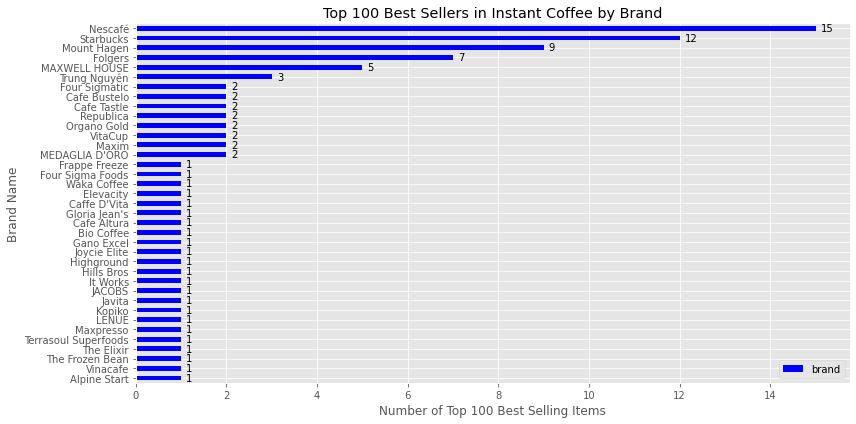

In [50]:
coffee_top100 = coffee_for_analysis[coffee_for_analysis['top_sales_rank']<=100]
plt.figure(figsize=(12,6))
bars=coffee_top100.groupby('brand')['brand'].count().sort_values(ascending=True).plot(kind='barh',color='b')
bars.set_title('Top 100 Best Sellers in Instant Coffee by Brand')
plt.xlabel('Number of Top 100 Best Selling Items')
plt.ylabel('Brand Name')
plt.legend()
plt.tight_layout()

rects=bars.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.0f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.

plt.savefig("image.png")

plt.show()

In [51]:
import seaborn as sns

<Figure size 864x432 with 0 Axes>

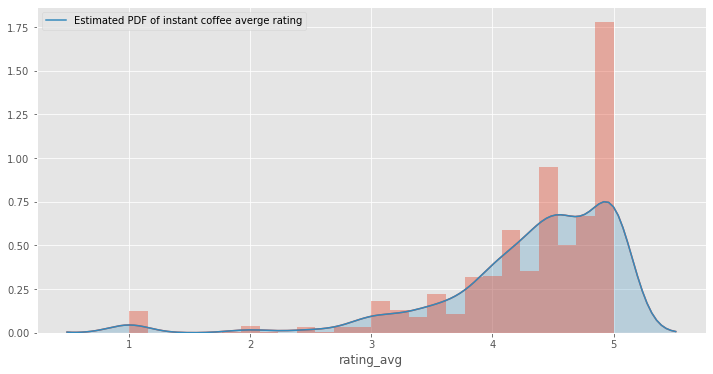

In [52]:
plt.figure(figsize=(12,6))
sns.distplot(coffee_for_analysis['rating_avg'])
sns.kdeplot(coffee_for_analysis['rating_avg'], shade=True, label='Estimated PDF of instant coffee averge rating')

(array([57., 18.,  6.,  2.,  3.,  1.,  0.,  1.,  0.,  2.]),
 array([  15. ,  396.2,  777.4, 1158.6, 1539.8, 1921. , 2302.2, 2683.4,
        3064.6, 3445.8, 3827. ]),
 <a list of 10 Patch objects>)

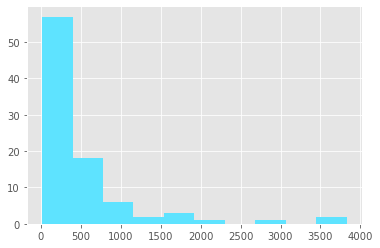

In [53]:
plt.hist(coffee_top100[coffee_top100.rating_nums>0]['rating_nums'],color="#5ee3ff")

<Figure size 864x432 with 0 Axes>

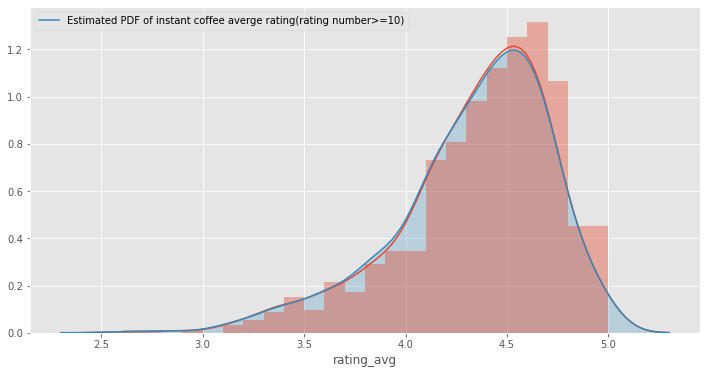

In [87]:
plt.figure(figsize=(12,6))
sns.distplot(coffee_for_analysis[coffee_for_analysis['rating_nums']>10]['rating_avg'])
sns.kdeplot(coffee_for_analysis[coffee_for_analysis['rating_nums']>=10]['rating_avg'], shade=True, label='Estimated PDF of instant coffee averge rating(rating number>=10)')

<Figure size 864x432 with 0 Axes>

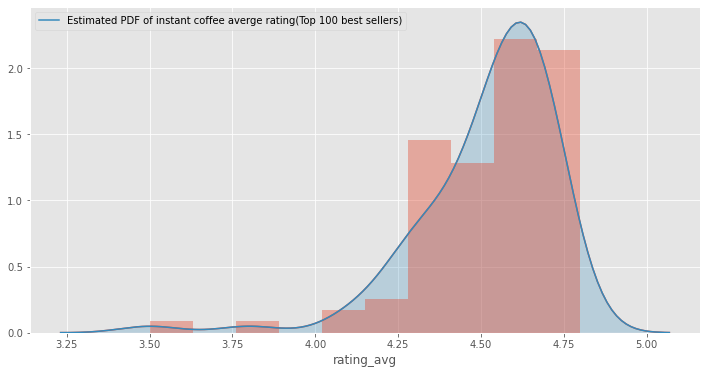

In [55]:
plt.figure(figsize=(12,6))
sns.distplot(coffee_top100['rating_avg'])
sns.kdeplot(coffee_top100['rating_avg'], shade=True, label='Estimated PDF of instant coffee averge rating(Top 100 best sellers)')

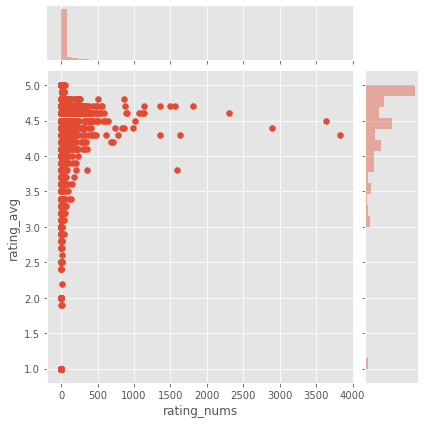

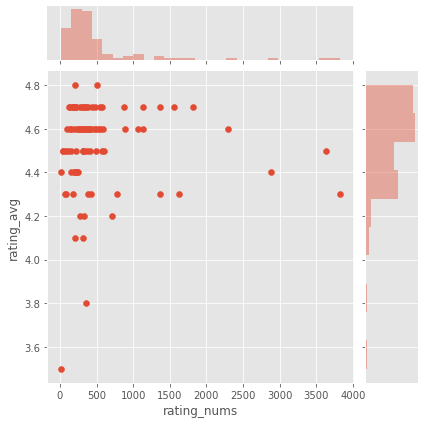

In [56]:
sns.jointplot(coffee_for_analysis['rating_nums'], coffee_for_analysis['rating_avg'])
sns.jointplot(coffee_top100['rating_nums'], coffee_top100['rating_avg'])

In [57]:
coffee_for_analysis.top_sales_rank.replace('None',np.nan)
coffee_for_analysis.sort_values(by='top_sales_rank',inplace=True)

ASIN
5480451286    5878.0
9748836843    4826.0
B0001MAF1Q    1477.0
B0001MAF2U    1604.0
B0001MAF4S    2141.0
               ...  
B08DK8JNHC       NaN
B08DK93YN8       NaN
B08DKK7N9Y       NaN
B08DKK8WKS       NaN
B08DKQLWTM       NaN
Name: top_sales_rank, Length: 4369, dtype: float64

<ipython-input-57-947c3902ea04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_for_analysis.sort_values(by='top_sales_rank',inplace=True)


In [58]:
coffee_corrplot=coffee_for_analysis[coffee_for_analysis['top_sales_rank']<=2000]
coffee_corrplot.top_sales_rank.min()
coffee_corrplot.top_sales_rank.max()
coffee_corrplot['top_sales_rank_percentile']= (2000-coffee_corrplot['top_sales_rank'])/2000

1.0

1998.0

<ipython-input-58-b42176506a72>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_corrplot['top_sales_rank_percentile']= (2000-coffee_corrplot['top_sales_rank'])/2000


In [59]:
coffee_corrplot1=coffee_corrplot[['top_sales_rank_percentile','price_in_US_dollars','amazon_choice',\
                      'subscribe_flag','answered_questions','rating_avg',\
                      'rating_nums','rating_1_star','rating_2_star','rating_3_star','rating_4_star','rating_5_star']]
corr = coffee_corrplot1.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,top_sales_rank_percentile,price_in_US_dollars,amazon_choice,subscribe_flag,answered_questions,rating_avg,rating_nums,rating_1_star,rating_2_star,rating_3_star,rating_4_star,rating_5_star
top_sales_rank_percentile,1.00,-0.05,0.44,0.29,0.38,0.11,0.35,-0.03,0.01,0.01,0.02,0.26
price_in_US_dollars,-0.05,1.00,-0.07,-0.04,-0.04,0.07,-0.05,-0.04,-0.06,-0.04,-0.06,0.01
amazon_choice,0.44,-0.07,1.00,0.29,0.28,0.08,0.26,-0.04,-0.02,-0.01,0.02,0.14
subscribe_flag,0.29,-0.04,0.29,1.00,0.19,-0.04,0.17,0.03,0.04,0.08,0.02,0.05
answered_questions,0.38,-0.04,0.28,0.19,1.00,0.04,0.84,-0.01,0.01,0.01,0.02,0.11
rating_avg,0.11,0.07,0.08,-0.04,0.04,1.00,0.05,-0.82,-0.38,-0.34,-0.14,0.87
rating_nums,0.35,-0.05,0.26,0.17,0.84,0.05,1.00,-0.04,-0.01,-0.02,-0.00,0.04
rating_1_star,-0.03,-0.04,-0.04,0.03,-0.01,-0.82,-0.04,1.00,0.04,0.03,-0.03,-0.19
rating_2_star,0.01,-0.06,-0.02,0.04,0.01,-0.38,-0.01,0.04,1.00,0.00,-0.00,-0.11
rating_3_star,0.01,-0.04,-0.01,0.08,0.01,-0.34,-0.02,0.03,0.00,1.00,0.03,-0.17


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Sales Rank Percentile Boxplot by Fulfillment Methods')

Text(0, 0.5, 'Top 2K Best Sellers Rank Percentile')

Text(0.5, 0, 'Fulfillment Methods')

Text(2.5, 0.03, 'Amazon Product: Sold and Ship by Amazon\nFBA = Fulfilled by Amazon\nThird Party = Fulfilled by Merchant')

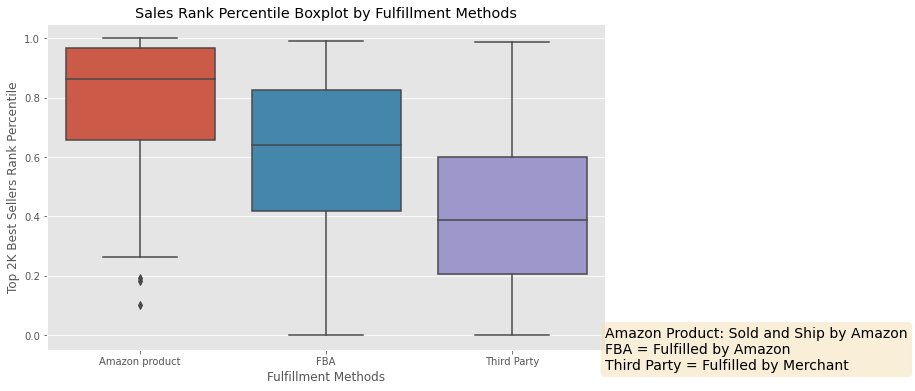

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x='FBA_label', y='top_sales_rank_percentile', data=coffee_corrplot[coffee_corrplot['FBA_label']!=''])
plt.title('Sales Rank Percentile Boxplot by Fulfillment Methods')
plt.ylabel('Top 2K Best Sellers Rank Percentile')
plt.xlabel('Fulfillment Methods')
textstr = '\n'.join((
    'Amazon Product: Sold and Ship by Amazon',
    'FBA = Fulfilled by Amazon',
    'Third Party = Fulfilled by Merchant'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(2.50, 0.03, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

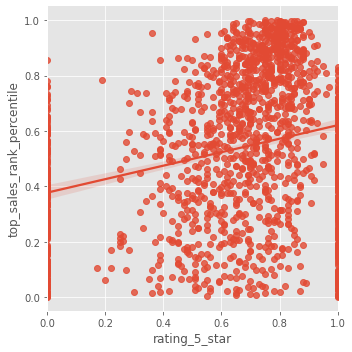

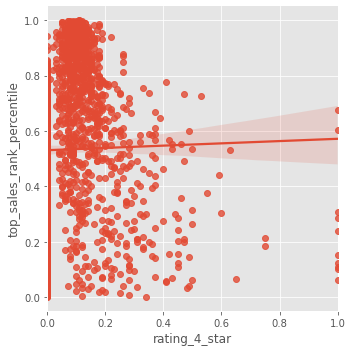

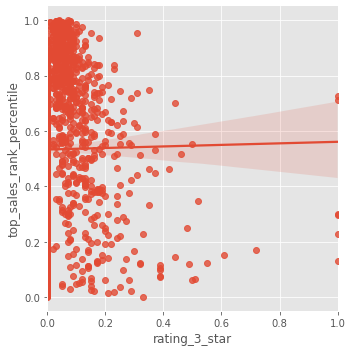

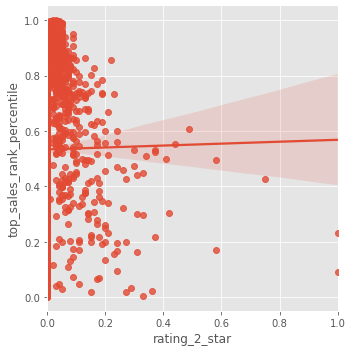

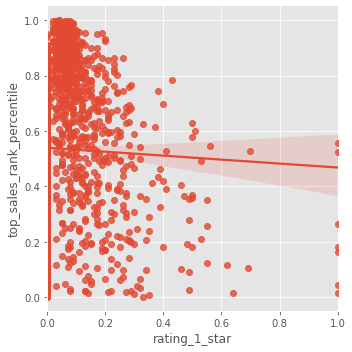

In [77]:
sns.lmplot(x="rating_5_star", y="top_sales_rank_percentile", data=coffee_corrplot1)
sns.lmplot(x="rating_4_star", y="top_sales_rank_percentile", data=coffee_corrplot1)
sns.lmplot(x="rating_3_star", y="top_sales_rank_percentile", data=coffee_corrplot1)
sns.lmplot(x="rating_2_star", y="top_sales_rank_percentile", data=coffee_corrplot1)
sns.lmplot(x="rating_1_star", y="top_sales_rank_percentile", data=coffee_corrplot1)

In [62]:
amazon_product =np.array(coffee_corrplot[coffee_corrplot.FBA_label=='Amazon product'].top_sales_rank_percentile)
FBA =np.array(coffee_corrplot[coffee_corrplot.FBA_label=='FBA'].top_sales_rank_percentile)
Third_party =np.array(coffee_corrplot[coffee_corrplot.FBA_label=='Third Party'].top_sales_rank_percentile)

In [63]:
from scipy import stats

In [64]:
stats.f_oneway(amazon_product, FBA, Third_party)

F_onewayResult(statistic=129.9064488031734, pvalue=1.820378534403764e-52)

In [65]:
stats.ttest_ind(FBA, Third_party)

Ttest_indResult(statistic=12.95061399846956, pvalue=3.620478591261701e-36)

#### Unit Price

In [66]:
coffee_unit = coffee_for_analysis[coffee_for_analysis.unit_price_unit=='ounce']

In [67]:
len(coffee_for_analysis)
len(coffee_unit)

4369

1177

In [68]:
coffee_unit.unit_price_USdollars.describe()
coffee_unit.top_sales_rank.describe()

count    1177.000000
mean       25.201784
std       124.817655
min         0.020000
25%         0.950000
50%         2.170000
75%         4.710000
max      1415.010000
Name: unit_price_USdollars, dtype: float64

count    1042.000000
mean     1692.435701
std      1527.520241
min         2.000000
25%       512.500000
50%      1232.000000
75%      2519.500000
max      7166.000000
Name: top_sales_rank, dtype: float64

In [69]:
coffee_unit.sort_values(by='top_sales_rank',inplace=True)
coffee_unit['top_sales_rank_percentile']= np.arange(1,1178)
coffee_unit['top_sales_rank_percentile']= np.where(coffee_unit['top_sales_rank_percentile']>1043,np.nan,coffee_unit['top_sales_rank_percentile'])

<ipython-input-69-f11a9b515a4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_unit.sort_values(by='top_sales_rank',inplace=True)
<ipython-input-69-f11a9b515a4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_unit['top_sales_rank_percentile']= np.arange(1,1178)
<ipython-input-69-f11a9b515a4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [70]:
coffee_unit['top_sales_rank_percentile']= (1043-coffee_unit['top_sales_rank_percentile'])/1043

<ipython-input-70-e3ed625e0128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_unit['top_sales_rank_percentile']= (1043-coffee_unit['top_sales_rank_percentile'])/1043


In [71]:
coffee_unit.top_sales_rank_percentile.describe()

count    1043.000000
mean        0.499521
std         0.288813
min         0.000000
25%         0.249760
50%         0.499521
75%         0.749281
max         0.999041
Name: top_sales_rank_percentile, dtype: float64

(22, 2)

,unit_price_USdollars,top_sales_rank_percentile
ASIN,,
B079BG9CCN,452.69,0.680729
B01DRB5QFC,481.30,0.598274
B07N2V28N5,678.47,0.567593
B07XTBJ7YQ,1415.01,0.564717
B07N323LLK,410.76,0.513902
B07L1Y9PM5,560.91,0.436242
B074X4C624,1167.14,0.401726
B013P19WQI,620.40,0.393097
B005F4ZUBK,898.58,0.289549


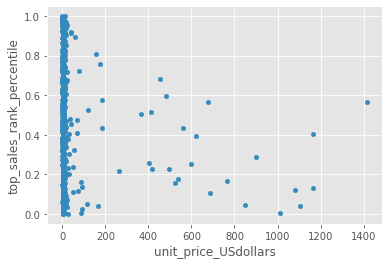

In [72]:
outliers = coffee_unit[['top_sales_rank_percentile', 'unit_price_USdollars']].dropna()
outliers = outliers.loc[~outliers.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
outliers.shape
outliers.merge(coffee_unit, how='left', left_index=True, right_index=True, suffixes=['', '_y'])[['unit_price_USdollars', 'top_sales_rank_percentile']].\
sort_values(by='top_sales_rank_percentile', ascending=False)
score_df = coffee_unit[['top_sales_rank_percentile', 'unit_price_USdollars']]
score_df.plot.scatter('unit_price_USdollars', 'top_sales_rank_percentile')

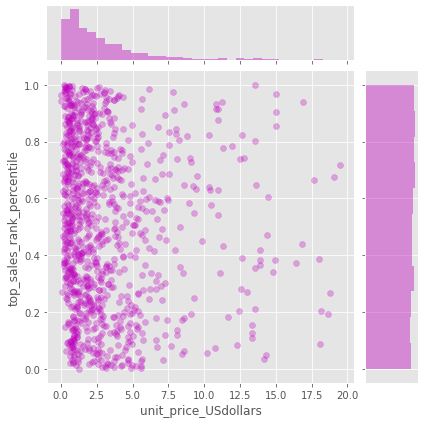

In [73]:
coffee_unit2=coffee_unit[coffee_unit.unit_price_USdollars<20]
sns.jointplot(coffee_unit2["unit_price_USdollars"],coffee_unit2["top_sales_rank_percentile"], color="m",alpha=.3)